In [25]:
import pandas as pd
import numpy as np
from os import getcwd, listdir, path
import matplotlib.pyplot as plt
import utils


In [16]:
fitness = []
ex_names = ['easytugwar_sketch0', 'easytugwar_sketch1', 'easytugwar_sketch2', 'easytugwar_sketch3']
for name in ex_names:
    file_path = path.join(getcwd(), "..", "results", name, "best_fitness.csv")
    data = pd.read_csv(file_path, header=None)
    #convert to numpy array
    data = data.values
    #compute median and interquartile range of each row
    median = np.median(data, axis=1)
    q1 = np.percentile(data, 25, axis=1)
    q3 = np.percentile(data, 75, axis=1)
    fitness.append([median, q1, q3])


In [22]:
np.shape(fitness[3][1])

(501,)

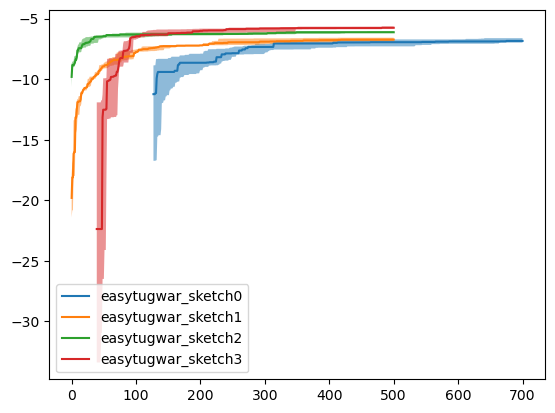

In [23]:
for i in range(len(ex_names)):
    plt.plot(range(len(fitness[i][0])), fitness[i][0], label=ex_names[i])
    plt.fill_between(range(len(fitness[i][0])), fitness[i][1], fitness[i][2], alpha=0.5)
plt.legend()
plt.show()

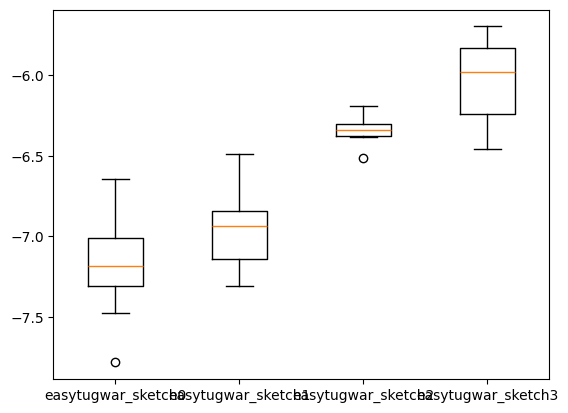

In [50]:
#create a boxplot with the median and the interquartile range
import pandas as pd
fitness_5000 = []
for name in ex_names:
    fitness_5000_i, _ = utils.read_fitness_and_program(name)
    #remove nan values
    fitness_5000_i = np.array(fitness_5000_i)
    fitness_5000_i = fitness_5000_i[~np.isnan(fitness_5000_i)]
    fitness_5000.append(fitness_5000_i)
    #fitness_5000.append(fitness_5000_i)

plt.boxplot(fitness_5000, labels=ex_names)
plt.show()



9